TASK 5 - Descision Trees and Random Forests

STEP 1- Train Decision Tree Classifier and visualize the tree

In [45]:
#imported all the necessary libraries like pandas, numpy, matplotlib, sklearn, and graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier
import graphviz

In [46]:
hearts = pd.read_csv('heart.csv')

hearts = hearts.replace('?', np.nan)  # Replace '?' with NaN
hearts = hearts.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors to NaN
hearts = hearts.dropna()  # Drop rows with NaN values
hearts['target'] = hearts['target'].astype(int)  # Ensure target is integer type
hearts['target'] = hearts['target'].apply(lambda x: 1 if x == 1 else 0)  # Convert target to binary



STEP 1- Train the descision tree classifier and visualize the tree

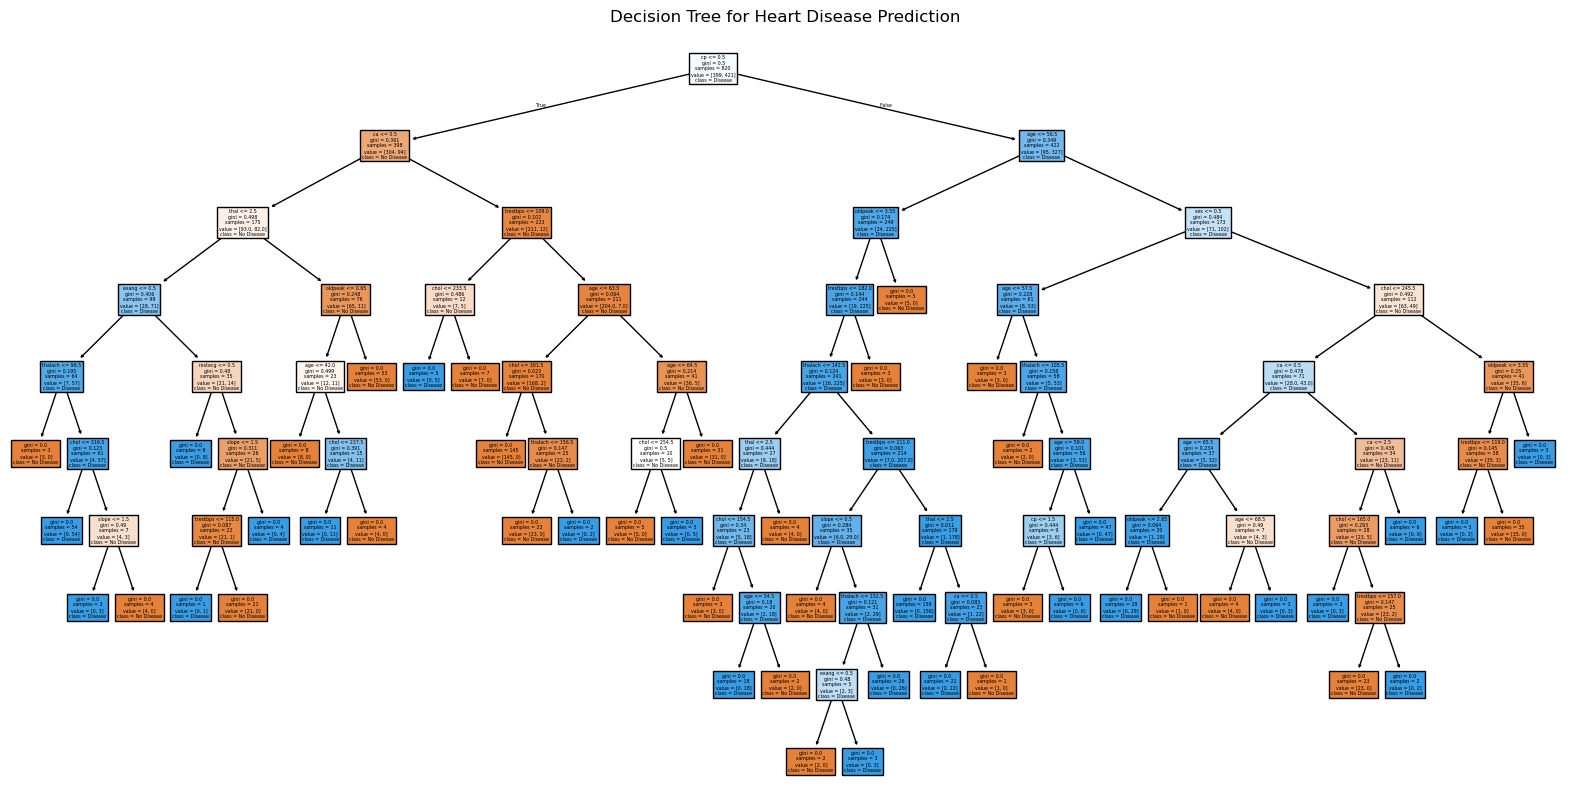

In [47]:

#preparing features and target variable
X = hearts.drop('target', axis=1)
Y = hearts['target']

#train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

#train the descision tree classifier
classy = DecisionTreeClassifier(random_state=42)
classy.fit(X_train, Y_train)

#visualizing the decision tree
tree = export_graphviz(classy, out_file=None, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
graph = graphviz.Source(tree)
graph.render('heart_disease_tree', format='png', cleanup=True)  # Save the tree as a PNG file   

plt.figure(figsize=(20,10))
plot_tree(classy, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title('Decision Tree for Heart Disease Prediction')
plt.show()  # Display the decision tree plot

STEP 2 -  Analyzing overfitting and control depth

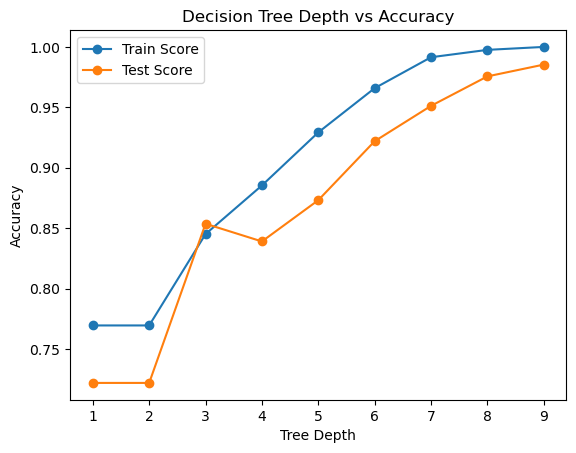

In [48]:
train_scores = []
test_scores = []
depths = range(1, 10)
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, Y_train)
    train_scores.append(clf.score(X_train, Y_train))
    test_scores.append(clf.score(X_test, Y_test))
    
plt.plot(depths, train_scores, label='Train Score', marker='o')
plt.plot(depths, test_scores, label='Test Score', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.legend()
plt.show()  

STEP 3 - Training random forest and comparing accuracy

In [49]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, Y_train)
print(f"Descision Tree Accuracy: {classy.score(X_test, Y_test):.2f}")
print(f"Random Forest Accuracy: {rfc.score(X_test, Y_test):.2f}")

Descision Tree Accuracy: 0.99
Random Forest Accuracy: 1.00


STEP 4 - Interpret Feature importances

Feature Importances:
cp          0.142094
thalach     0.117349
ca          0.114844
oldpeak     0.112634
thal        0.095930
age         0.091285
chol        0.077771
exang       0.073707
trestbps    0.067765
slope       0.048711
sex         0.026682
restecg     0.020438
fbs         0.010790
dtype: float64


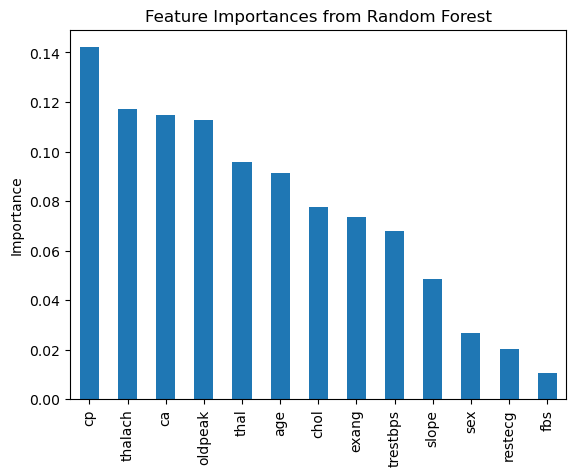

In [50]:
importances = rfc.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feat_imp)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.show()

STEP 5 - Evaluation using cross validation

In [51]:
from sklearn.model_selection import cross_val_score

dtc_scores = cross_val_score(classy, X, Y, cv=5)
rfc_scores = cross_val_score(rfc, X, Y, cv=5)

print(f"Decision Tree Classifier Cross-Validation Scores: {dtc_scores}")
print(f"Random Forest Classifier Cross-Validation Scores: {rfc_scores}")

Decision Tree Classifier Cross-Validation Scores: [1. 1. 1. 1. 1.]
Random Forest Classifier Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
